# **1. Data import and Understanding**

### Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
from sklearn.model_selection import train_test_split # Split data to train and test data(after merging in this case)
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix 
import warnings
warnings.filterwarnings('ignore')


# import libraries from tensorflow
from tensorflow import keras
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,Input, BatchNormalization, LeakyReLU, ReLU
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.initializers import HeUniform

In [ ]:
# Import dataset

df = pd.read_csv("download-2.csv") #reading the provided dataset
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Check for missing values and print percentage for each attribute.

In [ ]:
df.isnull().sum() #displays number of null values in each column

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [ ]:
df.isnull().sum()/(len(df))*100 #displays the percentage of null values of each column

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

There are no missing values in the dataset

### Check for presence of duplicate records in the dataset and impute with appropriate method.

In [ ]:
len(df[df.duplicated()]) #checking for any duplicate rows

240

- There are 240 duplicate records. It needs to be dropped.

In [ ]:
df = df.drop_duplicates()

In [ ]:
len(df[df.duplicated()]) #checking again for any duplicate rows after dropping them

0

- There were 240 duplicate records. These are now successfully removed.

### Visualize distribution of the target variable.

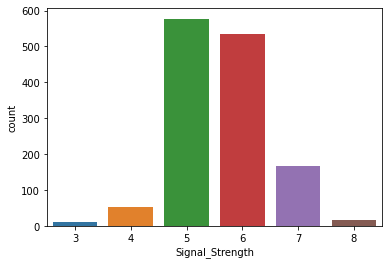

In [ ]:
sns.countplot(x = 'Signal_Strength', data = df)

The target variable Signal_Strength is highly imbalanced.

Most of the data are present for Signal strength 5 as compared to others.



### Share insights from the initial data analysis

1.   There are no missing values in the dataset.
2. There were 240 duplicate records in the dataset which are now successfully removed.
3.   The target variable is highly imbalanced and using this may result in a biased model. We need to handle this using either oversampling or undersampling.

# 2. Data preprocessing

### Split the data into X & Y.

In [ ]:
df_copy = df.copy()

In [ ]:
# separate independent variables in the X variable
X = df.drop('Signal_Strength',axis=1)
# separate target column (i.e. Signal_Strength) in the Y variable
Y = df['Signal_Strength']

In [ ]:
X_copy = X.copy()
Y_copy = Y.copy()

### Split the data into train & test with 70:30 proportion.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.3, random_state =42)
X_train2, X_val, Y_train2, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state =42)

### Print shape of all the 4 variables and verify if train and test data is in sync.

In [ ]:
# Checking the shape of data
X_train2.shape,X_test.shape, Y_train2.shape,Y_test.shape

((665, 11), (408, 11), (665,), (408,))

The train and test data are in sync

### Normalize the train and test data with appropriate method.

In [ ]:
## Scaling the data using standard scalar
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train2)
X_val_sc = ss.transform(X_val)
X_test_sc = ss.transform(X_test)

print(X_train_sc.shape,X_val_sc.shape)
print(len(ss.var_))

(665, 11) (286, 11)
11


### Transform Labels into format acceptable by Neural Network.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train_en = le.fit_transform(Y_train2)
Y_val_en = le.transform(Y_val)
Y_test_en = le.transform(Y_test)
print(le.classes_)

[3 4 5 6 7 8]


In [ ]:
## One hot encoding of the target columns
Y_train=tf.keras.utils.to_categorical(Y_train_en)
Y_val=tf.keras.utils.to_categorical(Y_val_en)
Y_test=tf.keras.utils.to_categorical(Y_test_en)

In [ ]:
Y_train2.shape

(665,)

# 3. Model Training & Evaluation using Neural Network

### Design a Neural Network to train a classifier

In [ ]:
#Intialize the model
model = Sequential([Input(shape=(11,)),  ## Input layer
                   Dense(128, activation='relu'), #hidden layer-1
                   Dense(56, activation='relu'), #hidden layer-2
                   Dense(28, activation='relu'),
                   Dense(6, activation='softmax')]) ## Output layer with 6 neurons


In [ ]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 56)                7224      
                                                                 
 dense_2 (Dense)             (None, 28)                1596      
                                                                 
 dense_3 (Dense)             (None, 6)                 174       
                                                                 
Total params: 10,530
Trainable params: 10,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,restore_best_weights=True)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), 
              loss='categorical_crossentropy', metrics=['accuracy'])

### Train the classifier using previously designed Architecture.

In [ ]:
# Fitting the model
train = model.fit(X_train_sc, Y_train,validation_data=(X_val_sc,Y_val),epochs=20,batch_size=10,callbacks=callback)

Epoch 1/20
67/67 [==============================] - 1s 6ms/step - loss: 1.2857 - accuracy: 0.4872 - val_loss: 1.0652 - val_accuracy: 0.5629
Epoch 2/20
67/67 [==============================] - 0s 4ms/step - loss: 1.0264 - accuracy: 0.5744 - val_loss: 1.0506 - val_accuracy: 0.5699
Epoch 3/20
67/67 [==============================] - 0s 4ms/step - loss: 0.9819 - accuracy: 0.5850 - val_loss: 1.0668 - val_accuracy: 0.5839
Epoch 4/20
67/67 [==============================] - 0s 4ms/step - loss: 0.9506 - accuracy: 0.5789 - val_loss: 1.0781 - val_accuracy: 0.5420


In [ ]:
# Predicting X_test basis the built model
y_pred = np.argmax(model.predict(X_test_sc), axis=1)
y_pred

array([2, 3, 4, 2, 3, 4, 3, 2, 3, 2, 3, 3, 3, 3, 4, 2, 3, 2, 2, 3, 2, 3,
       2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2,
       2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 4, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3,
       2, 2, 3, 3, 2, 4, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 4, 2, 2,
       3, 3, 3, 3, 3, 2, 3, 2, 3, 4, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 4, 4,
       3, 3, 2, 3, 2, 3, 3, 2, 2, 4, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2,
       3, 3, 2, 3, 4, 3, 3, 2, 2, 2, 4, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 4, 4, 3, 3, 3, 3, 2, 4, 3, 2, 3, 3, 4, 3, 3, 3, 4, 3,
       3, 2, 2, 4, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 4, 2, 4, 3, 4, 2, 2, 2, 3, 4, 3, 3, 2, 3, 3, 4, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 2, 2, 3,
       2, 2, 4, 2, 3, 3, 3, 4, 2, 2, 4, 3, 3, 3, 2, 2, 3, 3, 4, 3, 2, 2,
       3, 2, 3, 3, 2, 3, 3, 2, 4, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2,
       3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 4, 3, 2, 3,

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test_sc, Y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.9971228241920471
Accuracy: 0.5882353186607361


In [ ]:
from sklearn import metrics
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
confusion_matrix(Y_test_en, y_pred)

array([[  0,   0,   2,   3,   0,   0],
       [  0,   0,   4,   9,   0,   0],
       [  0,   0, 104,  68,   0,   0],
       [  0,   0,  35, 112,  17,   0],
       [  0,   0,   1,  25,  24,   0],
       [  0,   0,   0,   1,   3,   0]])

### Plot 2 separate visuals.
  1. Training Loss and Validation Loss

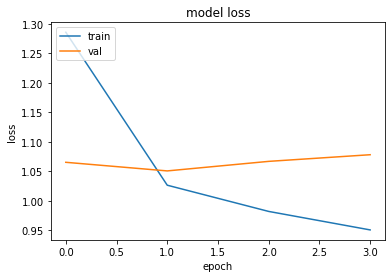

In [ ]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

2. Training Accuracy and Validation Accuracy

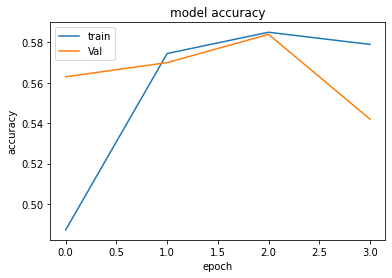

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

- The training loss is 0.9506 and validation loss is 1.0781
- The training accuracy is 0.5789 and validation accuracy is 0.5420

### Design new architecture/update existing architecture in attempt to improve the performance of the model.

### **Model Building with dropout**

In [ ]:
#Intialize the model
model2 = Sequential([Input(shape=(11,)),  ## Input layer
                   Dense(150, activation='relu'), #hidden layer-1
                   Dropout(0.1), #dropout after hidden layer 1
                   Dense(70, activation='relu'), #hidden layer-2
                   Dropout(0.1), #dropout after hidden layer 2
                   Dense(50, activation='relu'), #hidden layer 3
                   Dropout(0.1), #dropout after hidden layer 3
                   Dense(6, activation='softmax')]) ## Output layer with 6 neurons

In [ ]:
# Model Summary
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 150)               1800      
                                                                 
 dropout_15 (Dropout)        (None, 150)               0         
                                                                 
 dense_29 (Dense)            (None, 70)                10570     
                                                                 
 dropout_16 (Dropout)        (None, 70)                0         
                                                                 
 dense_30 (Dense)            (None, 50)                3550      
                                                                 
 dropout_17 (Dropout)        (None, 50)                0         
                                                                 
 dense_31 (Dense)            (None, 6)                

In [ ]:
chkpt = ModelCheckpoint('/content/checkpoint', monitor='val_loss', save_best_only=True,save_freq='epoch')
callback_new1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',restore_best_weights=True)
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001234), 
              loss='categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
# Fitting the model
train2 = model2.fit(X_train_sc, Y_train, 
                  validation_data=(X_val_sc,Y_val), 
                  epochs=50,batch_size=40)

Epoch 1/50
17/17 [==============================] - 0s 10ms/step - loss: 1.4260 - accuracy: 0.5038 - val_loss: 1.3767 - val_accuracy: 0.5175
Epoch 2/50
17/17 [==============================] - 0s 5ms/step - loss: 1.3854 - accuracy: 0.5263 - val_loss: 1.3309 - val_accuracy: 0.5245
Epoch 3/50
17/17 [==============================] - 0s 5ms/step - loss: 1.3384 - accuracy: 0.5263 - val_loss: 1.2879 - val_accuracy: 0.5245
Epoch 4/50
17/17 [==============================] - 0s 6ms/step - loss: 1.3085 - accuracy: 0.5429 - val_loss: 1.2502 - val_accuracy: 0.5385
Epoch 5/50
17/17 [==============================] - 0s 5ms/step - loss: 1.2633 - accuracy: 0.5519 - val_loss: 1.2176 - val_accuracy: 0.5385
Epoch 6/50
17/17 [==============================] - 0s 5ms/step - loss: 1.2421 - accuracy: 0.5278 - val_loss: 1.1901 - val_accuracy: 0.5490
Epoch 7/50
17/17 [==============================] - 0s 5ms/step - loss: 1.2157 - accuracy: 0.5459 - val_loss: 1.1657 - val_accuracy: 0.5594
Epoch 8/50
17/17 [=

- The training loss is 0.9557 and validation loss is 1.0577
- The training accuracy is 0.6075 and validation accuracy is 0.5839

In [ ]:
# Predicting X_test basis the built model
y_pred2 = np.argmax(model2.predict(X_test_sc), axis=1)
y_pred2

array([2, 3, 4, 2, 3, 4, 3, 2, 3, 2, 4, 3, 3, 2, 4, 2, 3, 2, 2, 3, 2, 3,
       2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 1, 3, 3, 2,
       2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 4, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3,
       2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2,
       3, 3, 3, 2, 1, 2, 3, 3, 2, 4, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 2, 3, 2, 2, 2, 2, 3, 4, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2,
       3, 3, 2, 1, 4, 3, 3, 2, 2, 2, 4, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2,
       2, 3, 2, 2, 3, 4, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 4, 3, 3, 3, 4, 3,
       3, 2, 2, 4, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 4, 2,
       4, 3, 2, 4, 2, 4, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 4, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 4, 3, 3, 1, 2, 2, 3,
       2, 2, 3, 2, 3, 3, 3, 4, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 4, 3, 2, 2,
       3, 2, 3, 3, 2, 3, 3, 2, 4, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2,
       3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2,

In [ ]:
# Final evaluation of the model
scores = model2.evaluate(X_test_sc, Y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.9439784288406372
Accuracy: 0.6151960492134094


In [ ]:
from sklearn import metrics
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
confusion_matrix(Y_test_en, y_pred2)

array([[  0,   1,   4,   0,   0,   0],
       [  0,   0,   7,   6,   0,   0],
       [  0,   2, 123,  47,   0,   0],
       [  0,   0,  49, 109,   6,   0],
       [  0,   1,   2,  28,  19,   0],
       [  0,   0,   0,   2,   2,   0]])

### **Model Building with Batch Normalization and other hyperparameters**

In [ ]:
#Intialize the model
model3 = Sequential([Input(shape=(11,)),  ## Input layer
                   Dense(150, activation='relu',kernel_initializer=HeUniform(seed=7)), #hidden layer-1
                   BatchNormalization(momentum=0.6),
                   Dense(70, activation='relu',kernel_initializer=HeUniform(seed=7)), #hidden layer-2
                   BatchNormalization(momentum=0.6),
                   Dense(40, activation='relu',kernel_initializer=HeUniform(seed=7)), #hidden layer 3
                   BatchNormalization(momentum=0.6),
                   Dense(6, activation='softmax')]) ## Output layer with 6 neurons

In [ ]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 150)               1800      
                                                                 
 batch_normalization_3 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dense_33 (Dense)            (None, 70)                10570     
                                                                 
 batch_normalization_4 (Batc  (None, 70)               280       
 hNormalization)                                                 
                                                                 
 dense_34 (Dense)            (None, 40)                2840      
                                                                 
 batch_normalization_5 (Batc  (None, 40)              

In [ ]:
chkpt = ModelCheckpoint('/content/checkpoint', monitor='val_loss', save_best_only=True,save_freq='epoch')

callback_bn = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3,restore_best_weights=True)

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00124), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
train3 = model3.fit(X_train_sc,Y_train,          
          validation_data=(X_val_sc,Y_val),
          epochs=50, batch_size=32)

Epoch 1/50
21/21 [==============================] - 3s 17ms/step - loss: 0.1049 - accuracy: 0.9594 - val_loss: 2.8162 - val_accuracy: 0.4720
Epoch 2/50
21/21 [==============================] - 0s 5ms/step - loss: 0.1351 - accuracy: 0.9459 - val_loss: 2.7795 - val_accuracy: 0.5140
Epoch 3/50
21/21 [==============================] - 0s 5ms/step - loss: 0.1231 - accuracy: 0.9459 - val_loss: 2.9448 - val_accuracy: 0.5280
Epoch 4/50
21/21 [==============================] - 0s 5ms/step - loss: 0.1105 - accuracy: 0.9669 - val_loss: 3.0190 - val_accuracy: 0.5035
Epoch 5/50
21/21 [==============================] - 0s 5ms/step - loss: 0.1168 - accuracy: 0.9594 - val_loss: 3.0115 - val_accuracy: 0.4895
Epoch 6/50
21/21 [==============================] - 0s 5ms/step - loss: 0.1201 - accuracy: 0.9549 - val_loss: 2.9578 - val_accuracy: 0.4755
Epoch 7/50
21/21 [==============================] - 0s 5ms/step - loss: 0.0982 - accuracy: 0.9624 - val_loss: 2.8649 - val_accuracy: 0.5000
Epoch 8/50
21/21 [=

- The training loss is 0.0752 and validation loss is 2.9604
- The training accuracy is 0.9714 and validation accuracy is 0.5035

In [ ]:
# Predicting X_test basis the built model
y_pred3 = np.argmax(model3.predict(X_test_sc), axis=1)
y_pred3

array([2, 3, 5, 2, 3, 4, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3,
       2, 2, 3, 2, 3, 2, 2, 3, 4, 5, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 3, 2, 3, 3, 2, 4, 2, 3, 2, 3,
       2, 2, 3, 4, 2, 5, 2, 3, 2, 2, 2, 3, 2, 2, 3, 4, 3, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 2, 2, 3, 2, 2, 4, 4, 3, 2, 2, 2, 2, 2, 3, 2, 4, 4, 3,
       3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 1, 3, 3, 2, 2, 3, 2, 2, 2, 2,
       3, 3, 2, 1, 4, 2, 3, 3, 2, 2, 4, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2,
       3, 3, 4, 1, 4, 2, 3, 3, 2, 1, 3, 4, 4, 2, 3, 3, 3, 3, 2, 2, 4, 2,
       3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 5, 2, 3, 3, 4, 2,
       3, 3, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 4, 4, 2, 3,
       2, 2, 2, 3, 2, 2, 5, 3, 2, 3, 3, 2, 2, 2, 3, 5, 3, 2, 2, 2, 2, 2,
       2, 3, 3, 2, 3, 5, 4, 4, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 4, 3, 2, 3,
       2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 1, 2, 3, 2, 2, 3, 3, 1,
       2, 2, 3, 4, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 4,

In [ ]:
# Final evaluation of the model
scores = model3.evaluate(X_test_sc, Y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 2.905094861984253
Accuracy: 0.4950980246067047


In [ ]:
from sklearn import metrics
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
confusion_matrix(Y_test_en, y_pred3)

array([[  0,   2,   3,   0,   0,   0],
       [  0,   0,   5,   8,   0,   0],
       [  0,   4, 109,  51,   7,   1],
       [  0,   2,  71,  68,  19,   4],
       [  0,   0,  10,  11,  25,   4],
       [  0,   0,   0,   3,   1,   0]])

### Plot visuals as in Q3.C and share insights about difference observed in both the models.

1. Training Loss and Validation Loss

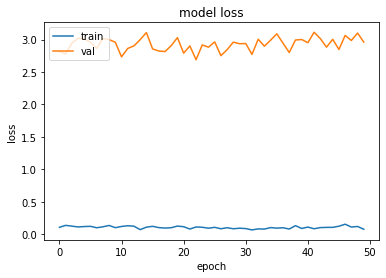

In [ ]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(train3.history['loss'])
plt.plot(train3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

2. Training Accuracy and Validation Accuracy

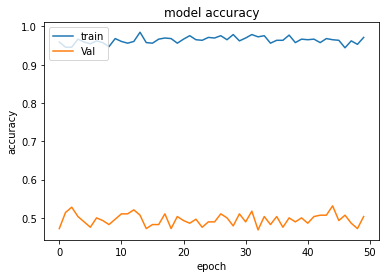

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train3.history['accuracy'])
plt.plot(train3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

Model 1 ( Base Model ) -

- The training loss is 0.9506 and validation loss is 1.0781
- The training accuracy is 0.5789 and validation accuracy is 0.5420
- The test accuracy is 0.5882

Model 2 ( With Dropout ) -

- The training loss is 0.9557 and validation loss is 1.0577
- The training accuracy is 0.6075 and validation accuracy is 0.5839
- The test accuracy is 0.6152

Model 3 ( With Batch Normalization and Weight Initialization ) -

- The training loss is 0.0752 and validation loss is 2.9604
- The training accuracy is 0.9714 and validation accuracy is 0.5035
- The test accuracy is 0.4951

The validation loss reduced from the base model to the model with dropout

The validation accuracy increased from the base model to the model with dropout

**Out of the 3 models, it is observed that the model with Dropout performed the best with a test accuracy of 0.6152**

It is overall observed that from the base model to the model with batch normalization, the training accuracy has increased significantly from 0.5789 to 0.9714, however, there is no significant improvement in the validation accuracy. 

The model is overfitted as it performs better on training but fails in validation. So, we are upsampling the data in order to achieve better accuracy.

In [ ]:
#SMOTE method to upsample smaller class
print("Before UpSampling, counts of label '3': {}".format(sum(Y_copy==3)))
print("Before UpSampling, counts of label '4': {} \n".format(sum(Y_copy==4)))
print("Before UpSampling, counts of label '5': {} \n".format(sum(Y_copy==5)))
print("Before UpSampling, counts of label '6': {} \n".format(sum(Y_copy==6)))
print("Before UpSampling, counts of label '7': {} \n".format(sum(Y_copy==7)))
print("Before UpSampling, counts of label '8': {} \n".format(sum(Y_copy==8)))

from imblearn.over_sampling import SMOTE
#Synthetic Minority Over Sampling Technique
sm = SMOTE(k_neighbors = 5, random_state=1)   
X_train_res2, y_train_res2 = sm.fit_resample(X_copy, Y_copy.ravel())

print("After UpSampling, counts of label '3': {}".format(sum(y_train_res2==3)))
print("After UpSampling, counts of label '4': {} \n".format(sum(y_train_res2==4)))
print("After UpSampling, counts of label '5': {} \n".format(sum(y_train_res2==5)))
print("After UpSampling, counts of label '6': {} \n".format(sum(y_train_res2==6)))
print("After UpSampling, counts of label '7': {} \n".format(sum(y_train_res2==7)))
print("After UpSampling, counts of label '8': {} \n".format(sum(y_train_res2==8)))

print('After UpSampling, the shape of train_X: {}'.format(X_train_res2.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res2.shape))

Before UpSampling, counts of label '3': 10
Before UpSampling, counts of label '4': 53 

Before UpSampling, counts of label '5': 577 

Before UpSampling, counts of label '6': 535 

Before UpSampling, counts of label '7': 167 

Before UpSampling, counts of label '8': 17 

After UpSampling, counts of label '3': 577
After UpSampling, counts of label '4': 577 

After UpSampling, counts of label '5': 577 

After UpSampling, counts of label '6': 577 

After UpSampling, counts of label '7': 577 

After UpSampling, counts of label '8': 577 

After UpSampling, the shape of train_X: (3462, 11)
After UpSampling, the shape of train_y: (3462,) 



In [ ]:
#Split the data into train & test with 70:30 proportion.
X_train_us, X_test_us, Y_train_us, Y_test_us = train_test_split(X_train_res2, y_train_res2 , test_size = 0.3, random_state =42)
X_train2_us, X_val_us, Y_train2_us, Y_val_us = train_test_split(X_train_us, Y_train_us, test_size = 0.3, random_state =42)

In [ ]:
# Checking the shape of data
X_train2_us.shape,X_test_us.shape, Y_train2_us.shape,Y_test_us.shape

((1696, 11), (1039, 11), (1696,), (1039,))

In [ ]:
## Scaling the data using standard scalar
from sklearn.preprocessing import StandardScaler
ss1 = StandardScaler()

X_train_sc_us = ss1.fit_transform(X_train2_us)
X_val_sc_us = ss1.transform(X_val_us)
X_test_sc_us = ss1.transform(X_test_us)

print(X_train_sc_us.shape,X_val_sc_us.shape)
print(len(ss1.var_))

(1696, 11) (727, 11)
11


In [ ]:
#Transform Labels into format acceptable by Neural Network.
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
Y_train_en_us = le1.fit_transform(Y_train2_us)
Y_val_en_us = le1.transform(Y_val_us)
Y_test_en_us = le1.transform(Y_test_us)
print(le1.classes_)

[3 4 5 6 7 8]


In [ ]:
## One hot encoding of the target columns
Y_train_us=tf.keras.utils.to_categorical(Y_train_en_us)
Y_val_us=tf.keras.utils.to_categorical(Y_val_en_us)
Y_test_us=tf.keras.utils.to_categorical(Y_test_en_us)

In [ ]:
Y_train2.shape

(665,)

In [ ]:
#Design a Neural Network to train a classifier
#Intialize the model
model_us = Sequential([Input(shape=(11,)),  ## Input layer
                   Dense(128, activation='relu'), #hidden layer-1
                   Dense(56, activation='relu'), #hidden layer-2
                   Dense(28, activation='relu'),
                   Dense(6, activation='softmax')]) ## Output layer with 6 neurons

In [ ]:
# Model Summary
model_us.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               1536      
                                                                 
 dense_37 (Dense)            (None, 56)                7224      
                                                                 
 dense_38 (Dense)            (None, 28)                1596      
                                                                 
 dense_39 (Dense)            (None, 6)                 174       
                                                                 
Total params: 10,530
Trainable params: 10,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback_us = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,restore_best_weights=True)
model_us.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fitting the model
train_us = model_us.fit(X_train_sc_us, Y_train_us,validation_data=(X_val_sc_us,Y_val_us),epochs=20,batch_size=10,callbacks=callback)

Epoch 1/20
170/170 [==============================] - 2s 4ms/step - loss: 1.2224 - accuracy: 0.4906 - val_loss: 0.9217 - val_accuracy: 0.6080
Epoch 2/20
170/170 [==============================] - 1s 3ms/step - loss: 0.8669 - accuracy: 0.6409 - val_loss: 0.8288 - val_accuracy: 0.6671
Epoch 3/20
170/170 [==============================] - 1s 3ms/step - loss: 0.7673 - accuracy: 0.6781 - val_loss: 0.8444 - val_accuracy: 0.6520
Epoch 4/20
170/170 [==============================] - 1s 3ms/step - loss: 0.6870 - accuracy: 0.7382 - val_loss: 0.6586 - val_accuracy: 0.7483
Epoch 5/20
170/170 [==============================] - 1s 3ms/step - loss: 0.6525 - accuracy: 0.7394 - val_loss: 0.6901 - val_accuracy: 0.7263
Epoch 6/20
170/170 [==============================] - 1s 3ms/step - loss: 0.5787 - accuracy: 0.7695 - val_loss: 0.6467 - val_accuracy: 0.7483
Epoch 7/20
170/170 [==============================] - 1s 3ms/step - loss: 0.5403 - accuracy: 0.7812 - val_loss: 0.6324 - val_accuracy: 0.7510
Epoch 

In [ ]:
# Predicting X_test basis the built model
y_pred_us = np.argmax(model.predict(X_test_sc_us), axis=1)
y_pred_us

array([4, 2, 3, ..., 2, 4, 3])

In [ ]:
# Final evaluation of the model
scores_us = model_us.evaluate(X_test_sc_us, Y_test_us, verbose=0)
print("Loss:", scores_us[0])
print("Accuracy:", scores_us[1])

Loss: 0.649937629699707
Accuracy: 0.7651588320732117


In [ ]:
from sklearn import metrics
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
confusion_matrix(Y_test_en_us, y_pred_us)

array([[  0,   0, 121,  51,   0,   0],
       [  0,   0,  93,  54,   0,   0],
       [  0,   0, 147,  42,   3,   0],
       [  0,   0,  69,  96,   8,   0],
       [  0,   0,  12, 101,  68,   0],
       [  0,   0,   0,  48, 126,   0]])

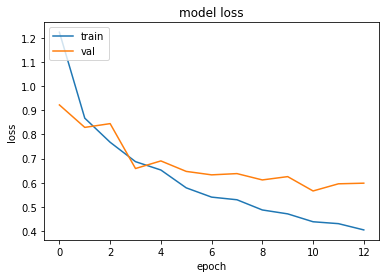

In [ ]:
#Plot 2 separate visuals.
#Training Loss and Validation Loss
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(train_us.history['loss'])
plt.plot(train_us.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

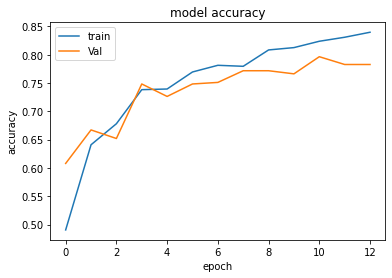

In [ ]:
#Training Accuracy and Validation Accuracy
import matplotlib.pyplot as plt

plt.plot(train_us.history['accuracy'])
plt.plot(train_us.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

- The training loss is 0.4046 and validation loss is 0.5980
- The training accuracy is 0.8396 and validation accuracy is 0.7827

From the base model, it can be observed that there is a significant increase in both training and validation accuracy with the upsampled data and the overfitting is also reduced significantly.

In [ ]:
#Model Building with dropout
#Intialize the model
model2_us1 = Sequential([Input(shape=(11,)),  ## Input layer
                   Dense(150, activation='relu'), #hidden layer-1
                   Dropout(0.1), #dropout after hidden layer 1
                   Dense(70, activation='relu'), #hidden layer-2
                   Dropout(0.1), #dropout after hidden layer 2
                   Dense(50, activation='relu'), #hidden layer 3
                   Dropout(0.1), #dropout after hidden layer 3
                   Dense(6, activation='softmax')]) ## Output layer with 6 neurons

In [ ]:
# Model Summary
model2_us1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 150)               1800      
                                                                 
 dropout_21 (Dropout)        (None, 150)               0         
                                                                 
 dense_45 (Dense)            (None, 70)                10570     
                                                                 
 dropout_22 (Dropout)        (None, 70)                0         
                                                                 
 dense_46 (Dense)            (None, 50)                3550      
                                                                 
 dropout_23 (Dropout)        (None, 50)                0         
                                                                 
 dense_47 (Dense)            (None, 6)               

In [ ]:
chkpt_us1 = ModelCheckpoint('/content/checkpoint', monitor='val_loss', save_best_only=True,save_freq='epoch')
callback_new1_us1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',restore_best_weights=True)
model2_us1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000142), 
              loss='categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
# Fitting the model
train2_us1 = model2_us1.fit(X_train_sc_us, Y_train_us, 
                  validation_data=(X_val_sc_us,Y_val_us), 
                  epochs=40,batch_size=89)

Epoch 1/40
20/20 [==============================] - 1s 15ms/step - loss: 0.0633 - accuracy: 0.9817 - val_loss: 0.9008 - val_accuracy: 0.8391
Epoch 2/40
20/20 [==============================] - 0s 5ms/step - loss: 0.0669 - accuracy: 0.9758 - val_loss: 0.8949 - val_accuracy: 0.8418
Epoch 3/40
20/20 [==============================] - 0s 5ms/step - loss: 0.0687 - accuracy: 0.9764 - val_loss: 0.8968 - val_accuracy: 0.8432
Epoch 4/40
20/20 [==============================] - 0s 5ms/step - loss: 0.0605 - accuracy: 0.9782 - val_loss: 0.9024 - val_accuracy: 0.8418
Epoch 5/40
20/20 [==============================] - 0s 5ms/step - loss: 0.0574 - accuracy: 0.9811 - val_loss: 0.9023 - val_accuracy: 0.8377
Epoch 6/40
20/20 [==============================] - 0s 5ms/step - loss: 0.0633 - accuracy: 0.9800 - val_loss: 0.9095 - val_accuracy: 0.8391
Epoch 7/40
20/20 [==============================] - 0s 5ms/step - loss: 0.0625 - accuracy: 0.9794 - val_loss: 0.9069 - val_accuracy: 0.8391
Epoch 8/40
20/20 [=

- The training loss is 0.0610 and validation loss is 0.9264
- The training accuracy is 0.9805 and validation accuracy is 0.8377

In [ ]:
# Predicting X_test basis the built model
y_pred2_us = np.argmax(model2_us.predict(X_test_sc_us), axis=1)
y_pred2_us

array([5, 2, 0, ..., 2, 4, 4])

In [ ]:
# Final evaluation of the model
scores_us1 = model2_us1.evaluate(X_test_sc_us, Y_test_us, verbose=0)
print("Loss:", scores_us1[0])
print("Accuracy:", scores_us1[1])

Loss: 1.1382566690444946
Accuracy: 0.7882579565048218


In [ ]:
from sklearn import metrics
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
confusion_matrix(Y_test_en_us, y_pred2_us)

array([[147,  18,   7,   0,   0,   0],
       [ 24,  97,  19,   7,   0,   0],
       [ 17,  33, 100,  36,   2,   4],
       [  6,  28,  46,  57,  22,  14],
       [  2,   1,   6,  36,  73,  63],
       [  0,   0,   0,   0,   1, 173]])

### Model trained with upsampled data - 

Model 1 ( Base Model ) -

- The training loss is 0.4046 and validation loss is 0.5980
- The training accuracy is 0.8396 and validation accuracy is 0.7827
- The test accuracy is 0.7652

Model 2 ( With Dropout ) -

- The training loss is 0.0610 and validation loss is 0.9264
- The training accuracy is 0.9805 and validation accuracy is 0.8377
- The test accuracy is 0.7883

The training reduced significantly from the base model to the model with dropout

The training and validation accuracy increased significantly from the base model to the model with dropout

**Out of the 2 models, it is observed that the model with Dropout performed the best with a test accuracy of 0.7883**

**Hence, it can be observed that the model trained with upsampled data gave a better accuracy of 0.7883 than the one without oversampling which gave an accuracy of 0.6152.**